# Dérivée et descente du gradient


Ce cours présente l'algorithme de descente du gradient, un pilier du deep learning. Pour bien comprendre, faisons un rappel sur la dérivée.


In [1]:
import matplotlib.pyplot as plt 
import numpy as np

## Compréhension intuitive de la dérivée


Prenons une fonction : $f(x) = 2x^2 - 3x + 4$


In [3]:
def f(x):
  return 2*x**2-3*x+4
f(3)

13

Traçons cette fonction avec matplotlib.


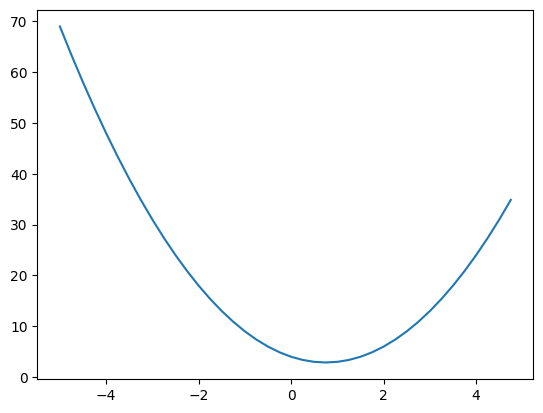

In [4]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

La dérivée donne la pente de la tangente à la courbe en un point.
Pour la calculer, on utilise la formule :
$f'(x) = \lim_{h \to 0} \frac{f(x+h)-h}{h}$
Avec un petit $h$, on peut estimer la pente numériquement.

**Note** : La pente montre comment $y$ change quand $x$ varie. Si $x$ augmente de 1 et $y$ de 2, la pente est 2.


In [4]:
h=0.0001
x=-1.0
print("Dérivée en x=-1 : ", (f(x+h)-f(x))/h)
x=2.0
print("Dérivée en x=2 : ", (f(x+h)-f(x))/h)

Dérivée en x=-1 :  -6.999800000002665
Dérivée en x=2 :  5.000200000004895


Le graphique montre que la pente est négative en $x=-1$ et positive en $x=2$.
Le **signe** de la dérivée indique le sens de la pente, et sa **valeur** montre son intensité.
Vérifions avec les [dérivées usuelles](https://fr.wikipedia.org/wiki/Table_de_d%C3%A9riv%C3%A9es_usuelles) :
Pour $f(x)=2x²-3x+4$, on a $f'(x)=4x-3$.
On trouve $f'(-1) \approx -7$ et $f'(2) \approx 5$.
Les résultats ne sont pas exacts car $h$ n'est pas infiniment petit.


In [5]:
# On définit deriv_f = f'(x)
def deriv_f(x):
  return 4*x-3

## Les bases de l'optimisation par descente de gradient


L'optimisation vise à minimiser ou maximiser une fonction objectif.
Pour trouver le minimum, deux approches sont possibles :
1. Résoudre $f'(x)=0$ :
   $4x-3=0 \implies x=\frac{3}{4}$.
   Cela donne le minimum dans ce cas, mais pas toujours en général.

2. Utiliser la **descente du gradient** :
   On part d'un point, par exemple $x=2$.
   On calcule $f'(2)=5$. La pente positive signifie que si $x$ augmente, $f(x)$ aussi, et inversement.
   Pour minimiser $f(x)$, on ajuste $x$ avec un facteur $\alpha$ (learning rate).
   On obtient $x_{new}=x - pente \times \alpha=2-0.5=1.5$.
   On recalcule $f'(1.5)=3$, toujours positif, donc on diminue encore $x$.
   La descente du gradient ajuste $x$ en boucle jusqu'à atteindre un minimum, en tenant compte de la pente.


In [6]:
# Descente du gradient
x=2.0 # valeur aléatoire de x
alpha=0.01 # pas
iterations=250 # nombre d'itérations

for i in range(iterations):
  grad=deriv_f(x)
  if (grad>0):
    x=x-alpha
  elif(grad<0):
    x=x+alpha
  else:
    print("minimum found YAY, x = ",x)
print("approximate minimum found YAY, x = ",x)

approximate minimum found YAY, x =  0.7599999999999989


On obtient $x \approx \frac{3}{4}$. Avec un pas plus petit ($\alpha$) et plus d'itérations, on peut affiner le résultat.


## La règle de la chaîne


Avant d'aller plus loin, rappelons une règle mathématique essentielle pour le deep learning : la règle de la chaîne.
Elle permet d'entraîner les paramètres des couches cachées d'un réseau.
Si $y$ dépend de $u$, qui dépend de $x$, alors :
$\frac{dy}{dx}=\frac{dy}{du}\cdot\frac{du}{dx}$


Prenons un exemple avec des fonctions dépendantes :
$u=2x²-x-2$
$y=3u+1$
$\frac{dy}{dx}=\frac{dy}{du}\cdot\frac{du}{dx}$ avec $\frac{dy}{du}=3$ et $\frac{du}{dx}=2x-1$
$\frac{dy}{dx}=3(2x-1) = 6x-3$
Maintenant, on sait comment $x$ affecte $y$, et on peut appliquer l'algorithme de descente du gradient.


In [7]:
x=2.0
def deriv_y_x(x):
  return 6*x-3
for i in range(iterations):
  grad=deriv_y_x(x)
  if (grad>0):
    x=x-alpha
  elif(grad<0):
    x=x+alpha
  else:
    print("minimum found YAY, x = ",x)
print("approximate minimum found YAY, x = ",x)

approximate minimum found YAY, x =  0.49999999999999867


## Optimisation de plusieurs variables


Jusqu'ici, on a cherché le minimum d'une fonction avec une seule variable $x$.
Un avantage des méthodes d'optimisation est qu'on peut optimiser plusieurs variables en même temps avec la descente du gradient. Pour cela, il faut calculer la dérivée pour chaque variable.


Prenons 3 variables $a$, $b$ et $c$ dans le modèle :
$u=3a²-2a+b²+1$
$y=2u+c$
Pour appliquer la descente du gradient, calculons $\frac{dy}{da}$, $\frac{dy}{db}$ et $\frac{dy}{dc}$.
Avec la règle de la chaîne :
- Pour $a$ :
  $\frac{dy}{da} = \frac{dy}{du}\cdot\frac{du}{da} = 2(6a-2) = 12a-4$

- Pour $b$ :
  $\frac{dy}{db} = \frac{dy}{du}\cdot\frac{du}{db} = 2(2b) = 4b$

- Pour $c$ :
  $\frac{dy}{dc}=1$
Maintenant, on peut appliquer la descente du gradient.


In [8]:
def deriv_y_a(a):
  return 12*a-4
def deriv_y_b(b):
  return 4*b
def deriv_y_c(c):
  return 1

a=1.0
b=1.0
c=1.0
alpha=0.05
def deriv_y_x(x):
  return 6*x-3
for i in range(iterations):
  grad_a=deriv_y_a(a)
  grad_b=deriv_y_b(b)
  grad_c=deriv_y_c(b)
  if (grad_a>0):
    a=a-alpha
  else:
    a=a+alpha
  if (grad_b>0):
    b=b-alpha
  else:
    b=b+alpha
  if (grad_c>0):
    c=c-alpha
  else:
    c=c+alpha
print("approximate minimum found YAY, a = "+str(a)+" b = "+str(b)+" c = "+str(c))

approximate minimum found YAY, a = 0.29999999999999966 b = -3.191891195797325e-16 c = -11.50000000000003


On a trouvé des valeurs qui minimisent $y$ :
- $c$ tend vers moins l'infini avec beaucoup d'itérations.
- $b$ vaut 0.
- $a$ vaut 0.3.
